In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('city_temperature.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('city_temperature.csv')
df.head()

C:\Users\vishal\AppData\Local\Temp\ipykernel_2668\4099872671.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [4]:
df = df.drop('State',axis=1)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [5]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [6]:
df['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200], dtype=int64)

In [7]:
df.loc[df['Year']==200,'Year']=2000
df.loc[df['Year']==201,'Year']=2010
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [8]:
a= df.groupby(['Year','Region'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
a.head(20).style.background_gradient(cmap='Blues')

,Year,Region,AvgTemperature
175,2020,Africa,74.867798
109,2010,Middle East,74.841066
130,2013,Middle East,74.096354
165,2018,Middle East,73.461201
60,2003,Middle East,73.234932
102,2009,Middle East,72.982887
95,2008,Middle East,72.814018
46,2001,Middle East,72.698571
181,2020,South/Central America & Carribean,72.515579
144,2015,Middle East,72.165952


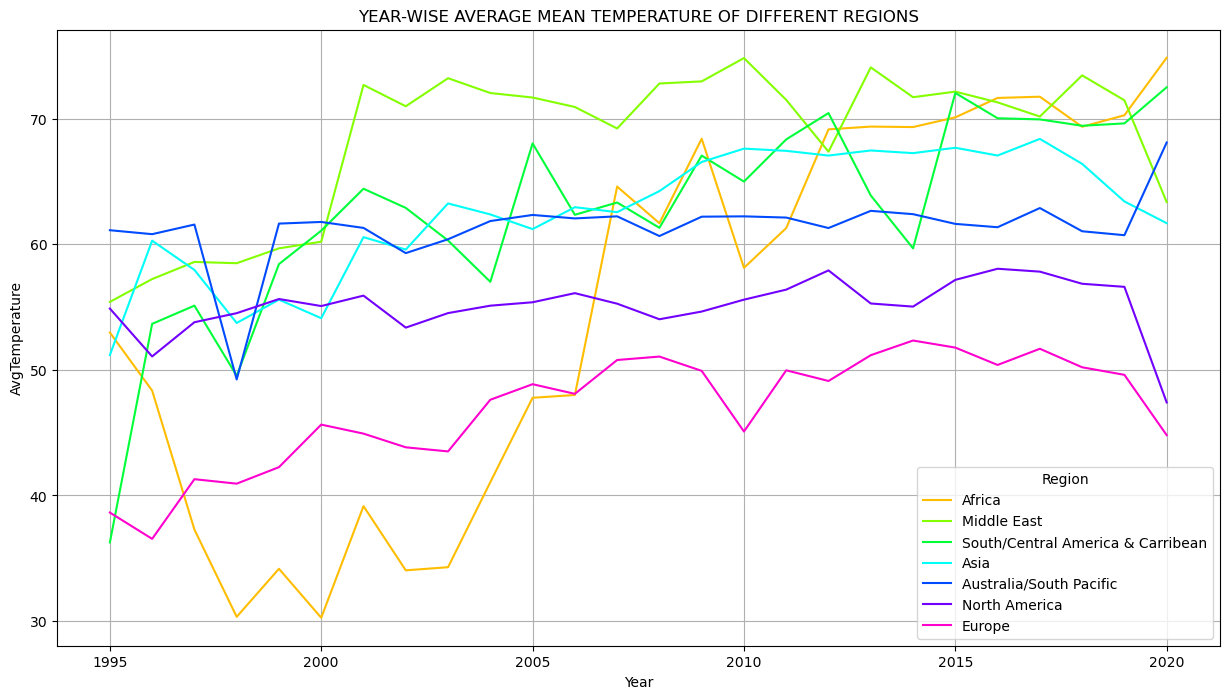

In [9]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='AvgTemperature',hue='Region',data=a,palette='hsv')
plt.grid()
plt.title('YEAR-WISE AVERAGE MEAN TEMPERATURE OF DIFFERENT REGIONS')
plt.show()

In [10]:
b= df.groupby(['Region','Month'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
b.head(20).style.background_gradient(cmap='Oranges')

,Region,Month,AvgTemperature
55,Middle East,8,110.000000
54,Middle East,7,109.900000
53,Middle East,6,109.900000
65,North America,6,107.700000
66,North America,7,107.500000
56,Middle East,9,106.900000
52,Middle East,5,104.900000
16,Asia,5,103.700000
17,Asia,6,103.600000
67,North America,8,103.500000


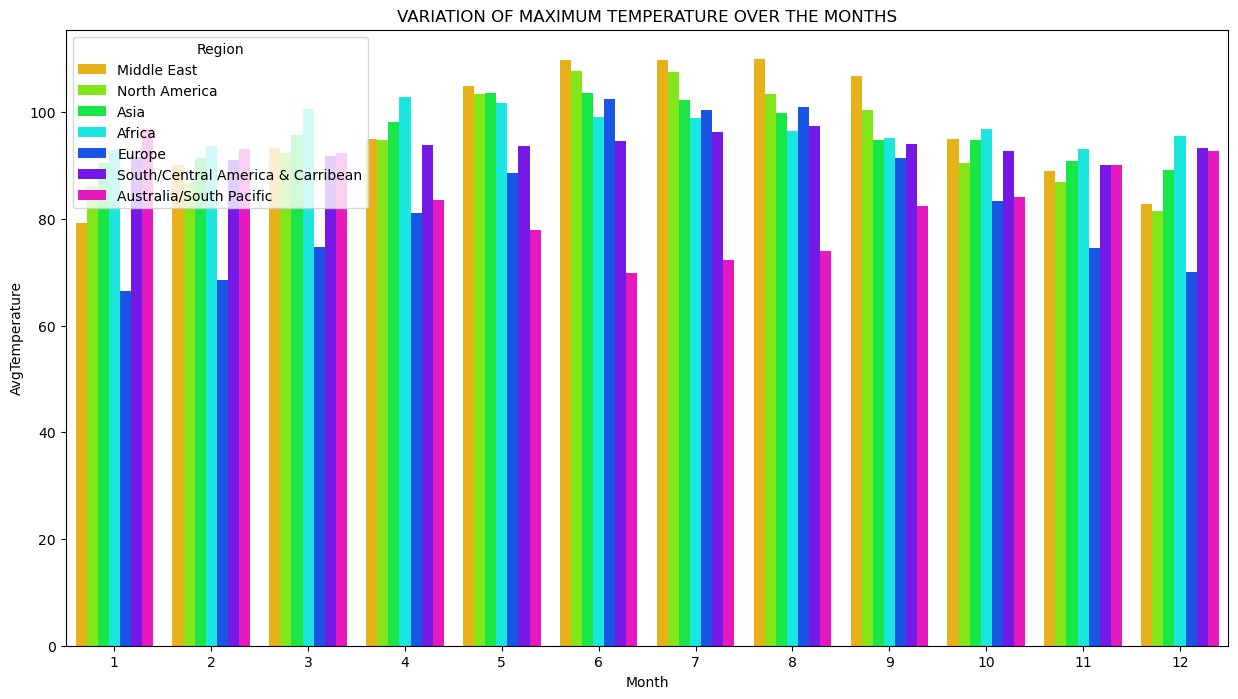

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(x='Month', y= 'AvgTemperature',data=b,hue='Region',palette='hsv',saturation=.80)
plt.title('VARIATION OF MAXIMUM TEMPERATURE OVER THE MONTHS')
plt.show()

In [13]:
c= df.groupby(['Region','Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
c.head(20).style.background_gradient(cmap='Greens')

,Region,Year,AvgTemperature
121,Middle East,2012,110.000000
126,Middle East,2017,109.900000
124,Middle East,2015,109.900000
114,Middle East,2005,109.900000
119,Middle East,2010,109.700000
117,Middle East,2008,109.500000
128,Middle East,2019,109.400000
122,Middle East,2013,109.400000
107,Middle East,1998,109.200000
109,Middle East,2000,109.200000


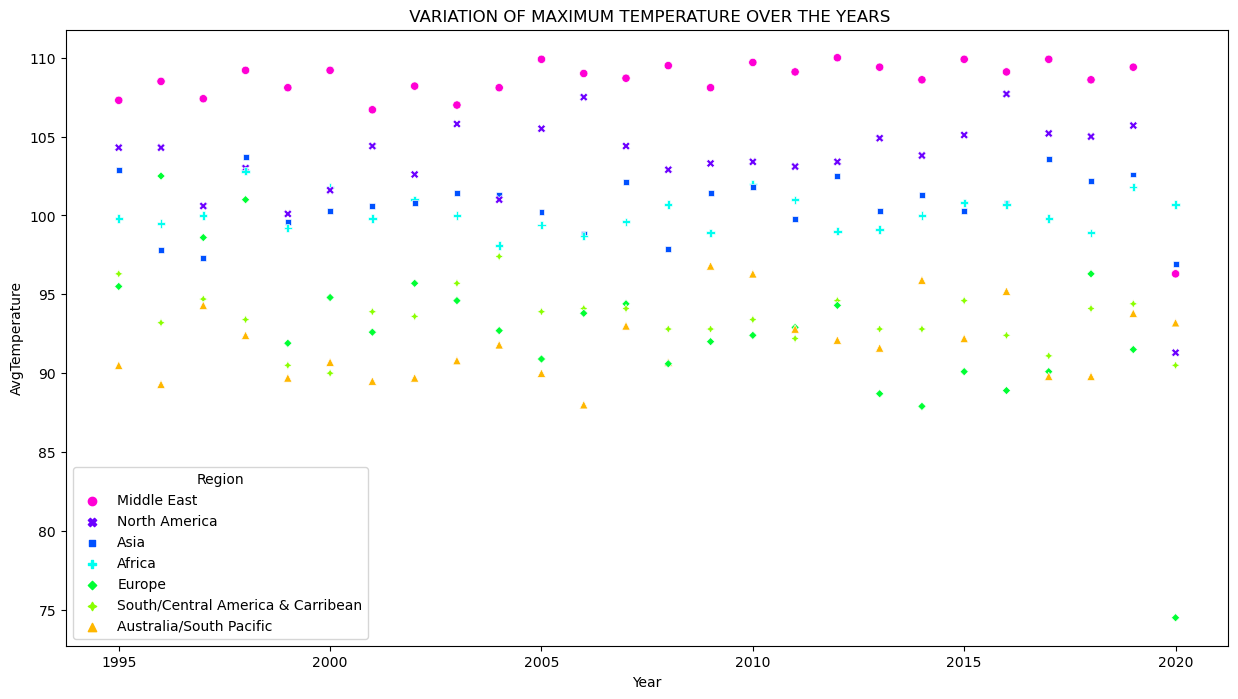

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Year',y='AvgTemperature',data=c,hue='Region',palette='hsv_r',style='Region')
plt.title(' VARIATION OF MAXIMUM TEMPERATURE OVER THE YEARS')
plt.show()